In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../output_cluster.csv')
df

,Frame,left_arm,right_arm,left_elbow,right_elbow,left_waist_leg,right_waist_leg,left_knee,right_knee,leftup_chest_inside,rightup_chest_inside,leftlow_chest_inside,rightlow_chest_inside,leg_spread,left_knee_cluster
0,0,155.837998,165.048384,7.879019,16.203205,12.307666,10.444382,3.660779,4.000295,96.014790,98.899940,82.250333,89.912350,145.543415,0
1,1,155.874618,164.825891,7.999507,15.652666,12.373966,10.955489,3.402736,3.099286,96.216111,98.816905,82.261934,89.441628,145.229081,0
2,2,155.852144,164.611898,8.121753,15.285695,12.433370,11.514419,3.080330,2.044690,96.367367,98.753524,82.256314,88.916788,144.827578,0
3,3,155.868677,164.495567,8.253437,15.077246,12.407303,11.715970,3.030304,1.542643,96.476172,98.682607,82.253789,88.781718,144.711884,0
4,4,155.883877,164.385000,8.395454,14.861519,12.388030,11.951920,3.032730,1.055825,96.553654,98.637703,82.385919,88.465487,144.572060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,1267,153.528258,165.798646,6.859750,12.411034,13.666220,12.170040,4.298884,0.402332,97.814233,98.685425,83.177179,87.486219,144.512597,0
1266,1268,153.560083,165.746967,6.818707,12.456492,13.630317,12.292662,4.265519,0.429164,97.778916,98.756045,83.222734,87.389248,144.501774,0
1267,1269,153.580160,165.713794,6.767640,12.480848,13.615782,12.374152,4.237318,0.319319,97.758582,98.783781,83.232216,87.320214,144.448594,0
1268,1270,153.544366,165.669726,6.704288,12.391258,13.681122,12.360236,4.190622,0.271315,97.776697,98.794554,83.204963,87.324929,144.444498,0


In [6]:
df['left_knee_cluster'].value_counts()

left_knee_cluster
0    953
1    312
2      5
Name: count, dtype: int64

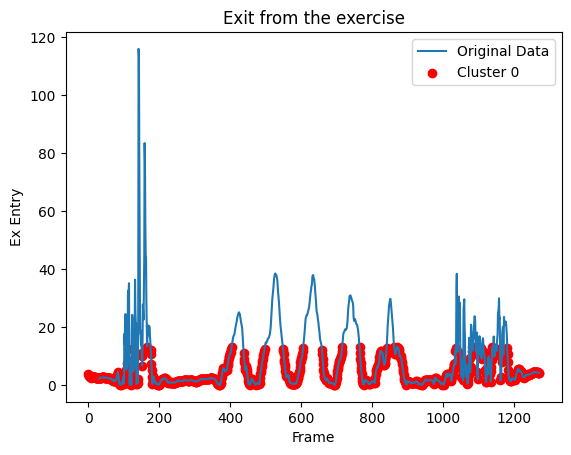

In [25]:
# Set the sequence length
seq_length = 30

# Extract selected frames based on cluster_to_extract
cluster_to_extract = 0
selected_frames = df[df['left_knee_cluster'] == cluster_to_extract]['Frame']
selected_angles = df[df['left_knee_cluster'] == cluster_to_extract]['left_knee']

# Visualize the selected data points
plt.plot(df['Frame'][seq_length:], df['left_knee'][seq_length:], label='Original Data')
plt.scatter(selected_frames, selected_angles, color='red', label=f'Cluster {cluster_to_extract}')
plt.title(f'Exit from the exercise')
plt.xlabel('Frame')
plt.ylabel('Ex Entry')
plt.legend()
plt.show()

In [14]:
# Set the sequence length
seq_length = 30

# Desired cluster to extract
cluster_to_extract = 1

# Filter the data based on the cluster label
cluster_data = df[df['left_knee_cluster'] == cluster_to_extract]

# Extract corresponding frames
entry_frames = cluster_data['Frame'][seq_length:].tolist()

print(entry_frames)

[161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 842, 843,

In [15]:
def separate_non_continuous_numbers(numbers):
    clusters = []
    current_cluster = []

    for num in sorted(numbers):
        if not current_cluster or num == current_cluster[-1] + 1:
            current_cluster.append(num)
        else:
            clusters.append(current_cluster)
            current_cluster = [num]

    if current_cluster:
        clusters.append(current_cluster)

    return clusters

nonc = separate_non_continuous_numbers(entry_frames)

In [18]:
valid = []
for li in nonc:
    if len(li)>seq_length:
        print(len(li))
        valid.append(li)
        
print(valid)

33
51
52
48
[[405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437], [498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548], [607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658], [717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764]]
